# TWITTER SENTIMENT ANALYSIS USING BERT

About dataset

The data is in uncleaned format and is collected using Twitter API. The Tweets has been filtered to keep only the English context. It targets mental health classification of the user at Tweet-level.

The label column appears to be the target variable, representing the mental health classification of the tweet.
0-nonmental,1-mental

import necessary libaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

reading csv file

In [3]:
df=pd.read_csv('Mental-Health-Twitter.csv')

In [4]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


Drop unwanted columns

In [5]:
df=df[['post_text','label']]

checking head and tail

In [6]:
df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [7]:
df.tail()

,post_text,label
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",0
19997,The flow chart is a most thoroughly oversold p...,0
19998,"Ships are safe in harbor, but they were never ...",0
19999,Black holes are where God is dividing by zero.,0


checking null values

In [8]:
df.isna().sum()

post_text    0
label        0
dtype: int64

checking info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  20000 non-null  object
 1   label      20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


check duplicates and drop duplicates

In [10]:
df.duplicated().sum()

512

In [11]:
df.drop_duplicates(inplace=True,keep='first')

In [12]:
df.duplicated().sum()

0

Data Visualization

<Axes: xlabel='label', ylabel='count'>

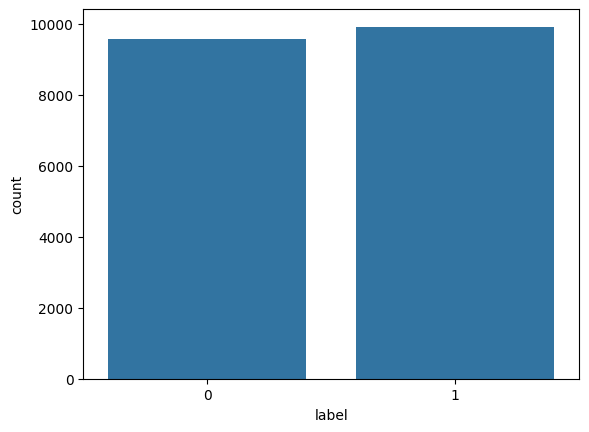

In [13]:
sns.countplot(x=df['label'])

shuffle the dataset and fetch only 1000 rows

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df = df.iloc[:1000]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  1000 non-null   object
 1   label      1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
df.head()

,post_text,label
0,@MishellKhan96 they're on Netflix!!,0
1,RT @larry_truelove3: Harry and Louis at the #B...,1
2,and due to some kind of complication I can't g...,1
3,When my iPhone stays on the same battery perce...,1
4,Literally the only way to my heart is puns and...,1


view some of the tweets

In [18]:
for i in range(10):
    print(df['post_text'][i])

@MishellKhan96 they're on Netflix!!
RT @larry_truelove3: Harry and Louis at the #BBMAs , 17/18-5-15 13# http://t.co/RfMvdZHLxa
and due to some kind of complication I can't give the gifts I want to give
When my iPhone stays on the same battery percentage for a long time I know it's bouta die out of no where..
Literally the only way to my heart is puns and sour stuff
thea and malia both have the evil dad + struggling against their nature thing going on,,,
@dmxhelp_ I'm a Mom and watching he Billboards, feel for you ! ❤
Syurga daddy. The ones that guide you to Heaven. https://t.co/f6f2GXUVn5
[panics and deletes every tweet I bve evef twfeted]

No no NO NOBODY MUST KNOW.
RT @KeiynanLonsdale: Wishing you all a Merry Christmas 🎄


Install the required libraries: tensorflow, transformers, and datasets.

In [19]:
pip install transformers tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


split into input and target variables

In [20]:
x=df['post_text']
y=df['label']

splitting into training and  testing sets

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,train_size=0.1)

loading bert model and tokenizer from hugging face transformer hub and also tokenize training and testing data

In [22]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load BERT model and tokenizer
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize training and testing data
train_tockenized = tokenizer(x_train.tolist(), padding='max_length', truncation=True, max_length=512)
test_tockenized = tokenizer(x_test.tolist(), padding='max_length', truncation=True, max_length=512)

C:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Create TensorFlow dataset from tokenized training and testing data and labels

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_tockenized), y_train)).batch(12)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_tockenized), y_test)).batch(12)

In [25]:
test_dataset

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

Compile the model with Adam optimizer, SparseCategoricalCrossentropy loss, and SparseCategoricalAccuracy metric

In [26]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])


Train the model on the training dataset for 1 epoch

In [27]:
model.fit(train_dataset,epochs=1)

9/9 [==============================] - 697s 75s/step - loss: 0.7040 - accuracy: 0.4700


installing evaluate

In [28]:
pip install evaluate


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Evaluate the model on the testing dataset

In [30]:
model.evaluate(test_dataset)

75/75 [==============================] - 788s 11s/step - loss: 0.6745 - accuracy: 0.6844


[0.6744710803031921, 0.6844444274902344]

Make predictions on the testing dataset

In [32]:
prediction=model.predict(test_dataset,y_test)

75/75 [==============================] - 808s 11s/step


In [33]:
prediction

TFSequenceClassifierOutput(loss=None, logits=array([[0.4017656 , 0.27492234],
       [0.2871797 , 0.44808784],
       [0.39480755, 0.4897854 ],
       ...,
       [0.38405204, 0.25176018],
       [0.3716492 , 0.43610838],
       [0.36280486, 0.4481639 ]], dtype=float32), hidden_states=None, attentions=None)

In [34]:
prediction[0]

array([[0.4017656 , 0.27492234],
       [0.2871797 , 0.44808784],
       [0.39480755, 0.4897854 ],
       ...,
       [0.38405204, 0.25176018],
       [0.3716492 , 0.43610838],
       [0.36280486, 0.4481639 ]], dtype=float32)

In [35]:
import numpy as np

In [36]:
pred = [np.argmax(i) for i in prediction[0]]

In [37]:
pred

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,


Evaluating accuracy_score,confusion_matrix,classification_report

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
accuracy_score(y_test,pred)

0.6844444444444444

In [40]:
confusion_matrix(y_test,pred)

array([[208, 230],
       [ 54, 408]], dtype=int64)

In [41]:
import seaborn as sns

<Axes: >

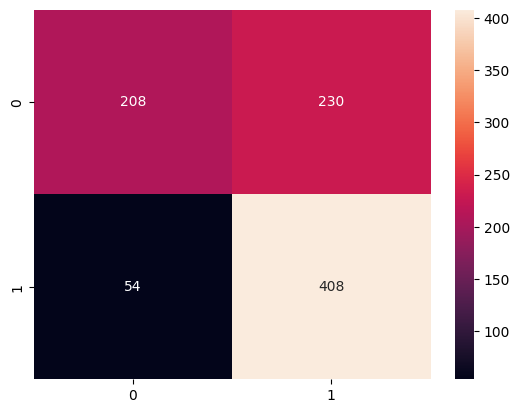

In [43]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')